In [1]:
%%capture
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import two_moons

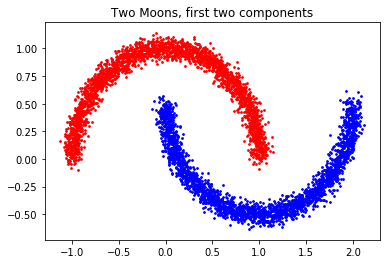

In [2]:
# Two moons data generation
X,y = two_moons.generateTwoMoonsData(N_points=5000, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Plot the data
plt.title('Two Moons, first two components')
plt.scatter(X[y==0,0], X[y==0,1], 3, c='r')
plt.scatter(X[y==1,0], X[y==1,1], 3, c='b')
plt.show()

In [3]:
# Simple neural network setup, single hidden layer with 30 nodes
model = Sequential()
model.add(Dense(30, input_dim=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
# Instantiate a callback object that will stop training when accuracy reaches 99.5%
stopping_callback = two_moons.StopCallback(0.995)

# Fit the model to training data
model.fit(X_train, y_train, epochs=1000, callbacks=[stopping_callback], verbose=1)

Epoch 1/1000
3500/3500 [==============================] - 0s 93us/step - loss: 0.5517 - acc: 0.7500
Epoch 2/1000
3500/3500 [==============================] - 0s 32us/step - loss: 0.4094 - acc: 0.8377
Epoch 3/1000
3500/3500 [==============================] - 0s 32us/step - loss: 0.3377 - acc: 0.8449
Epoch 4/1000
3500/3500 [==============================] - 0s 33us/step - loss: 0.3005 - acc: 0.8557
Epoch 5/1000
3500/3500 [==============================] - 0s 35us/step - loss: 0.2775 - acc: 0.8631
Epoch 6/1000
3500/3500 [==============================] - 0s 35us/step - loss: 0.2620 - acc: 0.8734
Epoch 7/1000
3500/3500 [==============================] - 0s 33us/step - loss: 0.2521 - acc: 0.8789
Epoch 8/1000
3500/3500 [==============================] - 0s 33us/step - loss: 0.2457 - acc: 0.8803
Epoch 9/1000
3500/3500 [==============================] - 0s 35us/step - loss: 0.2411 - acc: 0.8851
Epoch 10/1000
3500/3500 [==============================] - 0s 33us/step - loss: 0.2391 - acc: 0.8840

In [5]:
# Evaluate the model on the test data and save
filename = 'TwoMoonsModel.h5'
metrics = model.evaluate(X_test,y_test, verbose=0)
print('Accuracy on test set:', metrics[1])
model.save(filename)

Accuracy on test set: 0.9813333328564962


In [6]:
# Convert Keras model to DeepLift framework and compute importance scores on test data
scores = two_moons.computeDeepLiftScores(filename, X_test)

nonlinear_mxts_mode is set to: RevealCancel
Heads-up: I assume sigmoid is the output layer, not an intermediate one; if it's an intermediate layer then please bug me and I will implement the grad func
TARGET LAYER SET TO preact_1


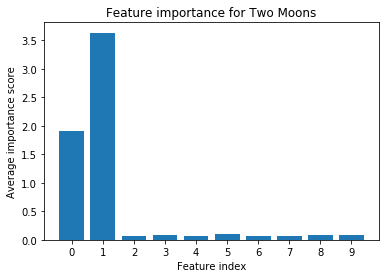

In [7]:
# Make a bar chart of average importance score magnitude by data point coordinate (1-10)
score_magnitudes = np.mean(np.abs(scores), axis=0)
plt.bar(range(10), score_magnitudes)
plt.title('Feature importance for Two Moons')
plt.xlabel('Feature index')
plt.ylabel('Average importance score')
plt.xticks(np.arange(10))
plt.show()

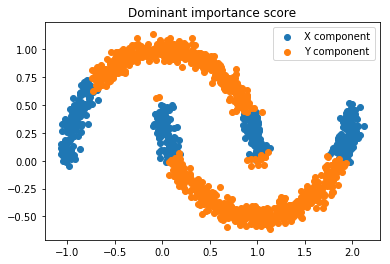

In [9]:
# Plot dominant importance score by test data point
idx_1 = np.where(abs(scores[:,0]) > abs(scores[:,1]))
idx_2 = np.where(abs(scores[:,0]) < abs(scores[:,1]))

plt.scatter(X_test[idx_1,0], X_test[idx_1,1])
plt.scatter(X_test[idx_2,0], X_test[idx_2,1])
plt.title('Dominant importance score')
plt.legend(('X component', 'Y component'))